<a href="https://colab.research.google.com/github/dgymjol/cs231n/blob/main/YAI_2%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C_activation_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# < 활성화 함수(Activation function)의 역할과 조건 >

1. ***활성화 함수(Activation function)는 딥러닝 네트워크에서 어떤 역할을 하나요?***

input에 대해서 weighted sum으로 output을 출력하는 함수로, MLP를 구성하기 위해 hidden layer를 만드는 데 쓰인다.

2. ***위에서 대답한 역할을 수행하기 위해 활성화 함수가 가져야 할 조건은 무엇인가요?***

non-linearity 가 있어야지, XOR과 같이 linear한 layer로만 해결할 수 없는 문제도 해결할 수 있게 된다. (hidden layer 구성)


### Module Import & Set Device

In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import time

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)  # 랜덤 시드 고정

if device == 'cuda':
    torch.cuda.manual_seed_all(777) # GPU 사용 가능할경우 랜덤 시드 고정

# Activation Function 구현

3. ***주어진 주피터노트북 코드의 #TODO#를 PyTorch를 사용해 작성하여 각 활성화함수를 구현해보세요.***

4. ***Custom activation function을 정의해 각 팀이 생각하는 조건을 갖춘 활성화 함수를 만들고 설명해주세요.***


### Abstract Class for each Activation Funtion

In [3]:
class BaseActivation:
    def __init__(self):
        pass
    
    def __call__(self, x):
        return x
    
    def parameters(self):
        return []

### Sigmoid

In [4]:
# Hint: torch.exp함수를 사용해보세요.
# Hint: https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html

class sigmoid(BaseActivation):
    def __call__(self, x):
        ################ TODO ################
        return torch.div(torch.tensor(1.0), torch.add(torch.tensor(1.0), torch.exp(torch.negative(x))))
        ################ TODO ################

### ReLU
Relu(x) = max(0, x)

In [5]:
zero_tensor = torch.Tensor([0]).to(device)

In [6]:
# Hint: torch.maximum과 zero_tensor를 활용해보세요.
# Hint: https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html?highlight=relu#torch.nn.ReLU

class relu(BaseActivation):
    def __call__(self, x):
        ################ TODO ################
        return torch.max(zero_tensor, x)
        ################ TODO ################

### Leaky ReLU

In [7]:
# Hint 1: torch.Tensor를 활용해 negative slope를 정의하세요
# Hint 2: torch.where를 활용해 조건에 따른 return값을 설정해보세요
# Hint: https://pytorch.org/docs/stable/generated/torch.nn.LeakyReLU.html?highlight=leakyrelu

class leakyrelu(BaseActivation):
    def __init__(self):
        ################ TODO ################
        self.negative_slope = torch.tensor(0.01)
        ################ TODO ################
        
    def __call__(self, x):
        ################ TODO ################
        return torch.where(x>= 0, x, self.negative_slope * x)
        ################ TODO ################

### PReLU

In [8]:
# Hint: 위와 마찬가지로 조건에 따른 return값을 설정해보세요.
# Hint: https://pytorch.org/docs/stable/generated/torch.nn.PReLU.html?highlight=prelu#torch.nn.PReLU

class prelu(BaseActivation):
    def __init__(self):
        self.alpha = torch.empty(1).fill_(0.25).to(device).requires_grad_()
        
    def __call__(self, x):
        ################ TODO ################
        return torch.where(x>= 0, x, self.alpha * x)      
        ################ TODO ################
        
    def parameters(self):
        return [self.alpha]

### ELU

In [9]:
# Hint: https://pytorch.org/docs/stable/generated/torch.nn.ELU.html?highlight=elu#torch.nn.ELU

class elu(BaseActivation):
    def __init__(self):
        self.alpha = torch.empty(1).fill_(1.0).to(device).requires_grad_()
        
    def __call__(self, x):
        ################ TODO ################
        return torch.where(x>= 0, x, self.alpha * torch.add(torch.exp(x), torch.tensor(-1.0)))
        ################ TODO ################
    
    def parameters(self):
        return [self.alpha]

###Your Custom Activation Function

In [23]:
# Custom activation을 만들어보세요.
class my_activation(BaseActivation):
    def __init__(self):
        ################ TODO ################
        self.negative_slope = torch.tensor(0.03)
        ################ TODO ################
        
    def __call__(self, x):
        ################ TODO ################
        return torch.where(x>= 0, x, self.negative_slope * x)
        # return torch.div(torch.sub(torch.exp(x), torch.exp(torch.negative(x)), alpha=1), torch.add( torch.exp(x), torch.exp(torch.negative(x))))
        ################ TODO ################

# MNIST 손글씨 이미지 분류하기


### 하이퍼파라미터 세팅

In [11]:
learning_rate = 0.01
epochs = 10
batch_size = 1024

### 데이터셋, 데이터 로더 정의

In [12]:
#손글씨 분류를 위한 데이터셋인 MNIST 데이터셋 다운로드

mnist_train = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                          train=True, # True로 지정하면 훈련 데이터로 다운로드
                          transform=transforms.ToTensor(), # 텐서 데이터로 변환
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                         train=False, # False로 지정하면 테스트 데이터로 다운로드
                         transform=transforms.ToTensor(), # 텐서 데이터로 변환
                         download=True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw




Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw




Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw




Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [13]:
# 다운로드 한 데이터셋을 이용해 데이터 로더 정의
# 데이터 로더는 iterable type으로, 반복문을 사용하여 한 번에 배치 사이즈만큼 데이터를 불러올 수 있음

data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

total_batch = len(data_loader)  # Mini-batch의 개수 = (전체 데이터 수 / batch size)

### 모델(신경망) 구조 정의

In [14]:
class Net(torch.nn.Module):
    def __init__(self, use):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(28*28, 64) # input image shape가 가로 28, 세로 28이므로 28*28
        self.fc2 = torch.nn.Linear(64, 32)
        self.fc3 = torch.nn.Linear(32, 16)
        self.fc4 = torch.nn.Linear(16, 10) # 최종 예측 클래스 종류는 0~9, 10가지이므로 10개
        
        # 파라미터로 주어진 activation 종다르게 설정
        if use == 'relu':
            self.activation = relu()
        elif use == 'sigmoid':
            self.activation = sigmoid()
        elif use == 'prelu':
            self.activation = prelu()
        elif use == 'leaky_relu':
            self.activation = leakyrelu()
        elif use == 'elu':
            self.activation = elu()
        elif use == 'custom':
            self.activation = my_activation()
            
    # fc1 -> activation -> fc2
    def forward(self, x):
        x = x.view(-1, 784)
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.activation(self.fc3(x))
        x = self.fc4(x)
        return x

### 모델 Training

In [15]:
# 모델을 생성하고 학습시킨 후, 성능을 performance_dict에 저장하는 함수
def train_eval(use):
    global performance_dict
    model = Net(use).to(device)
    criterion = torch.nn.CrossEntropyLoss().to(device)
    optimizer = torch.optim.Adam(list(model.parameters()) + model.activation.parameters(), lr=learning_rate)

    start = time.time(); test_accs = []
    print(f"\n###### Using Activation Function: {use.upper()} ######")
    for epoch in range(epochs):
        avg_loss = 0
        avg_acc = 0

        for X, Y in data_loader:
            X = X.to(device)
            Y = Y.to(device)

            optimizer.zero_grad()
            prediction = model(X)
            loss = criterion(prediction, Y)
            acc = (torch.argmax(prediction, 1) == Y).float().mean().item()
            loss.backward()
            optimizer.step()

            avg_loss += loss / total_batch
            avg_acc += acc / total_batch

        print(f'[Epoch: {epoch+1:>2}] train_loss: {avg_loss:.4f}, train_acc: {avg_acc:.4f}, ', end="")

        with torch.no_grad():
            X_test = mnist_test.data.view(len(mnist_test), 1, 28, 28).float().to(device)
            Y_test = mnist_test.targets.to(device)

            test_prediction = model(X_test)
            correct_prediction = torch.argmax(test_prediction, 1) == Y_test
            test_accuracy = correct_prediction.float().mean().item()
            test_accs.append(test_accuracy)
            print(f"test_acc: {test_accuracy:.4f}, best_acc: {max(test_accs):.4f}")
    
    performance_dict[use] = {'time': time.time()-start, 'accuracy' : max(test_accs)}

### 성능 확인

In [ ]:
#train_eval('custom')

In [24]:
performance_dict = {}
for use in ['relu', 'sigmoid', 'prelu', 'leaky_relu', 'elu', 'custom']:   #위에서 정의한 각 활성화함수를 이용해 훈련
    train_eval(use)
performance_df = pd.DataFrame(performance_dict).T


###### Using Activation Function: RELU ######
[Epoch:  1] train_loss: 0.7836, train_acc: 0.7396, test_acc: 0.9093, best_acc: 0.9093
[Epoch:  2] train_loss: 0.2399, train_acc: 0.9306, test_acc: 0.9340, best_acc: 0.9340
[Epoch:  3] train_loss: 0.1661, train_acc: 0.9514, test_acc: 0.9497, best_acc: 0.9497
[Epoch:  4] train_loss: 0.1364, train_acc: 0.9599, test_acc: 0.9560, best_acc: 0.9560
[Epoch:  5] train_loss: 0.1145, train_acc: 0.9662, test_acc: 0.9627, best_acc: 0.9627
[Epoch:  6] train_loss: 0.0991, train_acc: 0.9704, test_acc: 0.9610, best_acc: 0.9627
[Epoch:  7] train_loss: 0.0871, train_acc: 0.9741, test_acc: 0.9644, best_acc: 0.9644
[Epoch:  8] train_loss: 0.0793, train_acc: 0.9758, test_acc: 0.9606, best_acc: 0.9644
[Epoch:  9] train_loss: 0.0694, train_acc: 0.9784, test_acc: 0.9616, best_acc: 0.9644
[Epoch: 10] train_loss: 0.0654, train_acc: 0.9803, test_acc: 0.9669, best_acc: 0.9669

###### Using Activation Function: SIGMOID ######
[Epoch:  1] train_loss: 1.6815, train_acc: 

In [25]:
performance_df

,time,accuracy
relu,70.979829,0.9669
sigmoid,70.341251,0.9489
prelu,70.558551,0.9691
leaky_relu,70.260318,0.9685
elu,70.542988,0.9287
custom,70.468654,0.9707


Best Accuracy Activation Function was: 0.9707, custom
Custom Activation Function Accuracy Rank: 1
Custom Activation Function Time Complexity Rank: 3


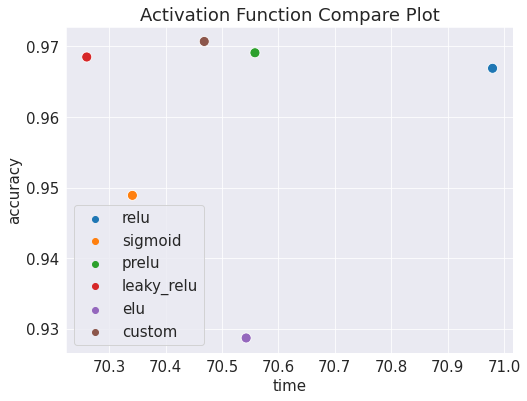

In [26]:
print(f"Best Accuracy Activation Function was: {performance_df['accuracy'].max():.4f}, {performance_df.index[performance_df['accuracy'].argmax()]}")
print(f"Custom Activation Function Accuracy Rank: {int(performance_df['accuracy'].rank(method='max', ascending=False)['custom'])}")
print(f"Custom Activation Function Time Complexity Rank: {int(performance_df['time'].rank(method='min')['custom'])}")

plt.figure(figsize=(8, 6))
sns.set_style('darkgrid')
plt.rcParams.update({'font.size': 15})
plt.title("Activation Function Compare Plot")
sns.scatterplot(data=performance_df, x='time', y='accuracy', hue=performance_df.index, s=100)
plt.show()


# < 손글씨 이미지 분류 >

5. ***손글씨 이미지 분류 성능이 활성화 함수에 따라 어떻게 달라지는지 확인해보세요.***


6. ***가장 성능이 좋았던, 그리고 가장 빠르게 모델이 학습되었던 활성화 함수는 각각 무엇인가요? 정의된 모델 구조를 참고하여 왜 그러한 결과가 나왔는지 분석해주세요.***

정확성이 가장 높았던 활성화 함수는 leaky_relu의 negative slope를 변형한 custom activation function이었고, 가장 빨랐던 것은 leaky_relu였습니다.

.
.
.